In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st 

In [2]:
df_match = pd.read_csv("IPL Matches 2008-2020.csv" , parse_dates=[2]) 
df_details = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [3]:
len(df_match.columns)

17

In [4]:
# overall match details
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df_match.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [6]:
# ball by ball details of each match
df_details.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Basic Info

### IPL Matches Data

In [7]:
df_match.shape

(816, 17)

In [8]:
df_match.describe()

,id,date,neutral_venue,result_margin
count,8.160000e+02,816,816.000000,799.000000
mean,7.563496e+05,2014-04-13 19:07:03.529411840,0.094363,17.321652
min,3.359820e+05,2008-04-18 00:00:00,0.000000,1.000000
25%,5.012278e+05,2011-04-26 18:00:00,0.000000,6.000000
50%,7.292980e+05,2014-04-23 12:00:00,0.000000,8.000000
75%,1.082626e+06,2017-04-30 00:00:00,0.000000,19.500000
max,1.237181e+06,2020-11-10 00:00:00,1.000000,146.000000
std,3.058943e+05,NaN,0.292512,22.068427


In [9]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [10]:
print("Null values in Matches Dataset:")
df_match.isnull().sum()

Null values in Matches Dataset:


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [11]:
# unique methods
df_match['method'].unique()

array([nan, 'D/L'], dtype=object)

In [12]:
# There are only two method wither D/L or match is played regularly.
# I replaced NaN values with 'regular' because there is no iterruption of rain in these matches
df_match['method']=df_match['method'].fillna('Regular')

In [13]:
# these matches were played in UAE as we can clearly is in venue.bb
df_match[df_match['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,Regular,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,Regular,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,Regular,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,Regular,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,Regular,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,Regular,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,Regular,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,Regular,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,Regular,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,Regular,Aleem Dar,VA Kulkarni


In [14]:
data = np.array(df_match)
venues = set(data[: , 4])
city = set(data[: , 1])

In [15]:
# filling missing values in city column
# match[1] != match[1] is used to check null values because np.isnan does not work on string values

for match in data:
    if match[1] != match[1] and match[4] == 'Dubai International Cricket Stadium':
        match[1] = 'Dubai'
    elif match[1] != match[1] and match[4] == 'Sharjah Cricket Stadium':
        match[1] = 'Sharjah'


In [16]:
# filling missing values in result margin 
# filled values 0 because these matches were ties

for match in data:
    if match[12] != match[12] and match[11] == 'tie':
        match[12] = float(0)

In [17]:
df_match = pd.DataFrame(data , columns=['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'] )

In [18]:
# dropped cancelled matches
df_match = df_match.dropna()

In [19]:
df_match.shape

(812, 17)

In [20]:
print(df_match.isnull().sum())
print("no more missing values")

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64
no more missing values


### IPL Ball by Ball data 

In [21]:
df_details.shape

(193468, 18)

In [22]:
df_details.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [23]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [24]:
df_details.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [25]:
df_match[df_match['id'] == 335982]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Regular,Asad Rauf,RE Koertzen


In [26]:
# type of values in dismissal_kind and player_dismissed
# nan means player is not out
df_details['dismissal_kind'].unique(),df_details['extras_type'].unique()

(array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
        'stumped', 'caught and bowled', 'hit wicket',
        'obstructing the field'], dtype=object),
 array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
       dtype=object))

In [27]:
df = df_details[df_details['bowling_team'].isnull()]

In [28]:
df['id'].unique()

array([501265, 829763], dtype=int64)

In [29]:
# these two matches are deleted that means these matches were suspended
501265 in df_match['id'].unique() , 829763 in df_match['id'].unique() 

(False, False)

In [30]:
# filled missing values
df_details['dismissal_kind'] = df_details['dismissal_kind'].fillna('not out')
df_details['player_dismissed'] = df_details['player_dismissed'].fillna('none')
df_details['fielder'] = df_details['fielder'].fillna('unknown')
df_details['extras_type'] = df_details['extras_type'].fillna('no extra')
# df_details = df_details.dropna()

In [31]:
df_details[df_details['bowling_team'].isnull()]['id'].unique()

array([501265, 829763], dtype=int64)

In [32]:
df_match.shape , len(df_details['id'].unique())

((812, 17), 816)

In [33]:
lst = []
for match in df_details['id'].unique():
    if match not in list(df_match['id']):
        lst.append(match)

In [34]:
lst

[501265, 829763, 829813, 1178424]

In [35]:
df_details.drop(df_details[df_details['id'].isin(lst)].index , inplace = True)

In [36]:
len(df_details['id'].unique())

812

## Questions to answer
---
- Count of matches played each season
- How many runs scored each season ?
- What were the runs scored per match in each season?
- Who has umpired the most ?
- What does the team decide after winning the toss ?
- How does the toss decision vary across the seasons ?
- Does winning the does imply winnig the match ?

In [37]:
print("number of matches affected by rain ", df_match[df_match['method'] == 'D/L'].shape[0])

number of matches affected by rain  19


#### How many matches played in each IPL season ?

In [38]:
df_match['season'] = df_match['date'].dt.year

df = df_match.groupby('season').count()
df.rename(columns={'id':'matches'} , inplace = True)

matches_per_season = dict(df['matches'])

print("Matches per season (2008 - 2020)")

print("-"*32)
for i in matches_per_season :
    print(i, ":" , matches_per_season[i] )
print("-"*32)


Matches per season (2008 - 2020)
--------------------------------
2008 : 58
2009 : 57
2010 : 60
2011 : 72
2012 : 74
2013 : 76
2014 : 60
2015 : 57
2016 : 60
2017 : 59
2018 : 60
2019 : 59
2020 : 60
--------------------------------


#### Runs scored in each season

In [39]:
df = df_details.groupby(['id', 'inning']).sum()

first_inning = []
second_inning = []

runs = dict(df['total_runs'])
for i in dict(df['total_runs']).keys():
    if i[1] == 1:
        first_inning.append(runs[i])
    else:
        second_inning.append(runs[i])
        

In [40]:
df_match['first_inning_runs'] = first_inning
df_match['second_inning_runs'] = second_inning
df_match['total_runs'] = df_match['first_inning_runs'] + df_match['second_inning_runs']

In [41]:
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,season,first_inning_runs,second_inning_runs,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,N,Regular,Asad Rauf,RE Koertzen,2008,222,82,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,N,Regular,MR Benson,SL Shastri,2008,240,207,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,N,Regular,Aleem Dar,GA Pratapkumar,2008,129,132,261
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,wickets,5.0,N,Regular,SJ Davis,DJ Harper,2008,165,166,331
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,N,Regular,BF Bowden,K Hariharan,2008,110,112,222


In [42]:
df = df_match[['season' , 'total_runs']]
print("Runs scored each season (2008 -2020)")
print("-"*30)
df = df.groupby('season').sum().reset_index()
df.style.hide()



Runs scored each season (2008 -2020)
------------------------------


season,total_runs
2008,17937
2009,16320
2010,18864
2011,21098
2012,22453
2013,22541
2014,18909
2015,17943
2016,18862
2017,18769


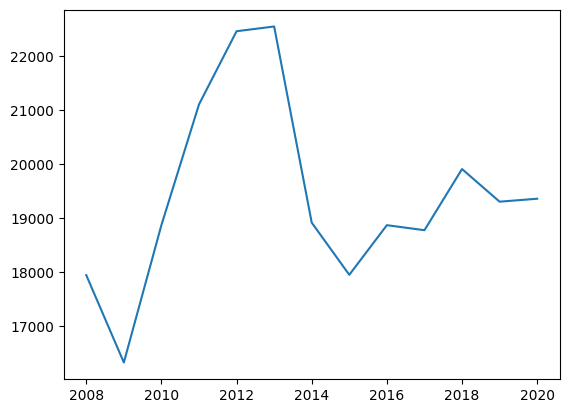

In [43]:
plt.plot(df.season , df.total_runs)

            Most runs were scored in 2013 season , having 22541 runs scored in a single season, 2011 and 2012 season are also among the high scoring seasons crossing 20k runs marks.
            In year 2011 , BCCI introduced 2 more franchises that indirectly increases number matches although these teams were terminated after 2013 that's why we can see decrease in runs scored.

### Runs scored per match in each season

In [44]:
df = df_match[['season','total_runs']].groupby('season').mean().reset_index()
df.rename(columns = {'total_runs':'average_runs'} , inplace = True)
df.style.hide()

season,average_runs
2008,309.258621
2009,286.315789
2010,314.400000
2011,293.027778
2012,303.418919
2013,296.592105
2014,315.150000
2015,314.789474
2016,314.366667
2017,318.118644


#### Who has umpired the most?

In [45]:
# find unique umpires
umpires = list(df_match['umpire1'])

for umpire in list(df_match['umpire2']):
    umpires.append(umpire)
    
umpires = list(set(umpires))

In [46]:
# count number of matches for each umpire
lst = []

for umpire in umpires:
    c = 0
    for i in range(len(df_match[['umpire1','umpire2']])): 
        
        if umpire in df_match[['umpire1','umpire2']].values[i]:
            c+=1

    lst.append([umpire, c])

In [47]:
pd.DataFrame(lst , columns=['Umpire' , 'No of Matches']).sort_values(by = 'No of Matches' , ascending=False).head(10).style.hide()

Umpire,No of Matches
S Ravi,121
HDPK Dharmasena,93
AK Chaudhary,87
C Shamshuddin,82
M Erasmus,65
Nitin Menon,57
CK Nandan,57
SJA Taufel,55
Asad Rauf,51
VA Kulkarni,50


#### What does the team decide after winnig the toss ?

In [48]:
df_match['toss_decision'].mode()[0]

'field'

<BarContainer object of 2 artists>

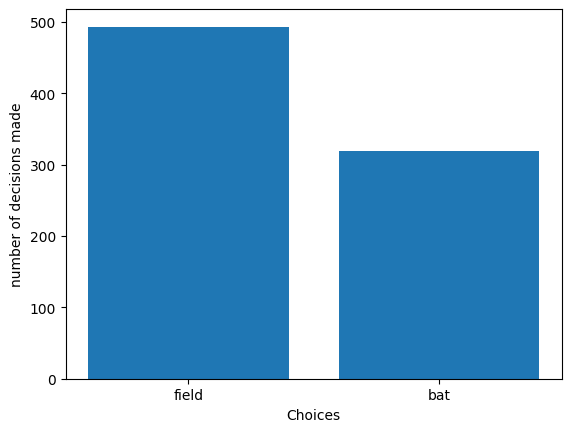

In [49]:
plt.xlabel('Choices')
plt.ylabel('number of decisions made')
plt.bar(df_match['toss_decision'].unique()   , list(df_match['toss_decision'].value_counts()))

In [50]:
df_match['toss_decision'].value_counts()

toss_decision
field    493
bat      319
Name: count, dtype: int64

majority of teams chose to field first after winnig the toss


#### Variations in toss decisions across the seasons

In [51]:
df_vals = df_match[['season' , 'toss_decision']].values

dic = {}
for s in df_match['season'].unique():
    lst = []
    for values in df_vals:
        if values[0] == s:
            lst.append(values[1])
    dic[s] = lst



In [52]:
print("Mode of Choices made in each season")
print("-"*30)
for s in df_match['season'].unique():
    print(s ,':', st.mode(dic[s]))
print("-"*30)


Mode of Choices made in each season
------------------------------
2008 : field
2009 : bat
2010 : bat
2011 : field
2012 : field
2013 : bat
2014 : field
2015 : field
2016 : field
2017 : field
2018 : field
2019 : field
2020 : field
------------------------------


We can see that in majority of seasons teams chose field first after winning the toss.

#### Does winning the toss imply winning the game

In [53]:
df_match.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'season',
       'first_inning_runs', 'second_inning_runs', 'total_runs'],
      dtype='object')

In [54]:
df_match[['team1', 'team2','toss_winner','toss_decision', 'winner']]

,team1,team2,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals


In [55]:
toss_winners = list(df_match['toss_winner'])
match_winner = list(df_match['winner'])

c = 0
for team in range(len(toss_winners)):
    
    if toss_winners[team] == match_winner[team]:
        c+=1

total_matches = len(match_winner)

ratio = (c/total_matches)*100

print("total matches played :",total_matches )
print("number of times toss winner and match winner is same :",c)
print("percentage :",ratio)

total matches played : 812
number of times toss winner and match winner is same : 418
percentage : 51.47783251231527


In IPL 812 matched are played in total in which 418 times match winnig team won the toss , that is 51% of matches of total matches played. So we can say that winning the toss favours the team, but T20 cricket is very dynamic game that's why these numbers are not very high.

#### how many times chasing team wins the match ?

When a chasing team wins the game the result is decided by the wickets. We will use attribute to answer this questions

In [56]:
chasers = df_match[df_match['result'] == 'wickets'].shape[0]

print("number of times chasing teams won: " , chasers)

ratio = (chasers/total_matches)*100

print("ratio chasing teams won to total matches: ", ratio)

number of times chasing teams won:  435
ratio chasing teams won to total matches:  53.57142857142857


We can see 53 times of 100 chasing team wins the match.

#### Which all teams have won this tournament before


In [57]:
df_match[df_match['eliminator'] == 'Y']['winner'].unique()

array(['Rajasthan Royals', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Kolkata Knight Riders'], dtype=object)

In [58]:
seasons = df_match['season'].unique()

print("IPL Champions form 2008 - 2020")
print("-"*30)

for s in seasons:
    champions = df_match[df_match['season'] == s].values[-1][10]
    print(s,' - ',champions)
    
print("-"*30)

IPL Champions form 2008 - 2020
------------------------------
2008  -  Rajasthan Royals
2009  -  Deccan Chargers
2010  -  Chennai Super Kings
2011  -  Chennai Super Kings
2012  -  Kolkata Knight Riders
2013  -  Mumbai Indians
2014  -  Kolkata Knight Riders
2015  -  Mumbai Indians
2016  -  Sunrisers Hyderabad
2017  -  Mumbai Indians
2018  -  Chennai Super Kings
2019  -  Mumbai Indians
2020  -  Mumbai Indians
------------------------------


Mumbai Indians is most successful team winnig most number of titles in 2013,2015,2017,2019,2020 seasons respectively.

#### Which team has won most number of times? 

In [59]:
team_ser = df_match.groupby('winner').count()
team_ser = team_ser['team1'].sort_values(ascending=False)
print("Top 5 teams with most number of wins")
print("-"*40)
team_ser.head()

Top 5 teams with most number of wins
----------------------------------------


winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Name: team1, dtype: int64

In [60]:
# creating new data frame for future use
df_teams = pd.DataFrame(data=team_ser , index=team_ser.index)
df_teams.reset_index(inplace=True)
df_teams

,winner,team1
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


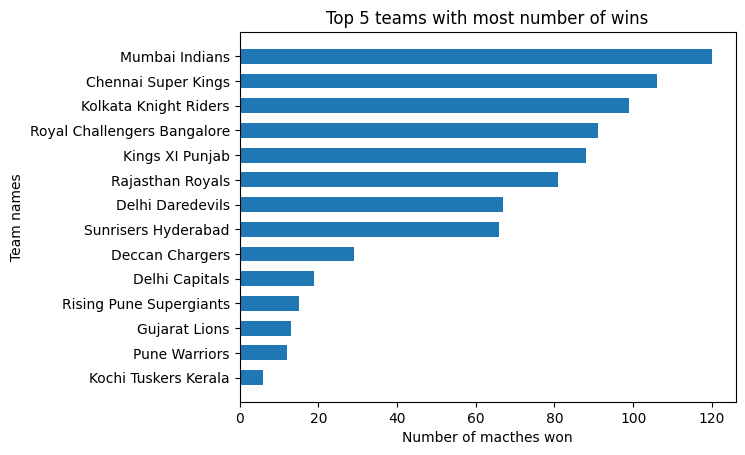

In [61]:
temp_df = df_teams.sort_values(by = 'team1')

plt.title("Top 5 teams with most number of wins")

plt.ylabel("Team names")
plt.xlabel("Number of macthes won")


plt.barh(temp_df['winner'],temp_df['team1'] ,height=0.6)
plt.show()

#### Which team has most number of matches? 


In [62]:
ser = df_match['team1'].value_counts().sort_index() + df_match['team2'].value_counts().sort_index()

df = pd.DataFrame(data = ser, index = ser.index).reset_index()

print("Top 5 teams having most number of matches")

temp_df = df.sort_values(by = 'count' , ascending=False)
temp_df.head().style.hide()

Top 5 teams having most number of matches


team1,count
Mumbai Indians,203
Kolkata Knight Riders,192
Royal Challengers Bangalore,192
Kings XI Punjab,190
Chennai Super Kings,178


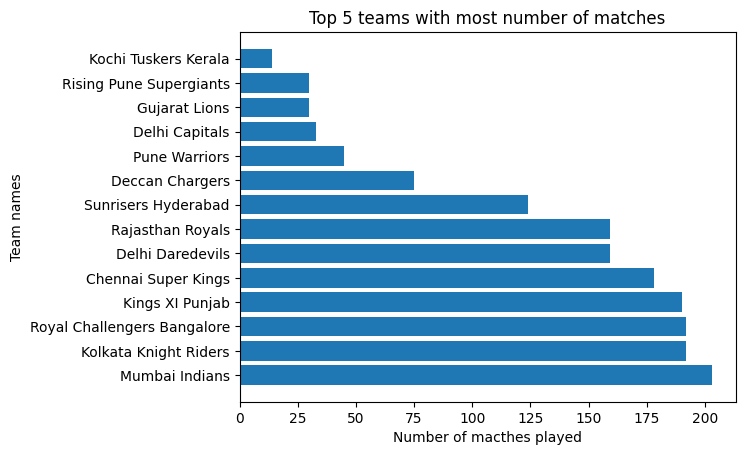

In [63]:

plt.title("Top 5 teams with most number of matches")

plt.ylabel("Team names")
plt.xlabel("Number of macthes played")


plt.barh(temp_df['team1'] , temp_df['count'])
plt.show()

#### Highest match winning percentage 

In [64]:
# sorting values of df_teams to order it same way as df
df_teams.sort_values(by = 'winner' , inplace=True) # no of wins
temp_df = temp_df.sort_values(by='team1')      # no of matches

In [65]:
# temp_df['wins'] = df_teams['team1']
temp_df

,team1,count
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,159
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,45


In [66]:
df_teams

,winner,team1
1,Chennai Super Kings,106
8,Deccan Chargers,29
9,Delhi Capitals,19
6,Delhi Daredevils,67
11,Gujarat Lions,13
4,Kings XI Punjab,88
13,Kochi Tuskers Kerala,6
2,Kolkata Knight Riders,99
0,Mumbai Indians,120
12,Pune Warriors,12


In [67]:
temp_df['wins'] = list(df_teams['team1'].values)

In [68]:
df_teams = temp_df
df_teams.rename(columns = {'team1':'teams' , 'count':'matches'} , inplace= True)
df_teams

,teams,matches,wins
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,159,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,45,12


In [69]:
# claculate match winning percentage 

df_teams['win_perc'] = (df_teams['wins']/df_teams['matches'] )*100

print("top 5 teams with highest winnig percentage")
df_teams.sort_values(by = 'win_perc' , ascending=False).head().style.hide()

top 5 teams with highest winnig percentage


teams,matches,wins,win_perc
Chennai Super Kings,178,106,59.550562
Mumbai Indians,203,120,59.113300
Delhi Capitals,33,19,57.575758
Sunrisers Hyderabad,124,66,53.225806
Kolkata Knight Riders,192,99,51.562500


Chennai Super kings have slightly higher winnig percentage than Mumbai Indians both have won 59% of there matches

#### is there any lucky venue for any team

In [70]:
venues = list(set(df_match['venue']))

df_match[df_match['venue'] == venues[1]]['team1'].value_counts()
# df_match[df_match['venue'] == '']



team1
Delhi Daredevils    6
Name: count, dtype: int64

#### Which team scored modt 200s

In [71]:
lst = []
for i in df_details['id'].unique():
    teams = []
    for team in df_details[df_details['id'] == i]['batting_team'].unique():
        teams.append(team)
        if len(teams) == 2:
            second_inning = df_details[(df_details['id'] == i) & (df_details['batting_team'] == teams[1])]['total_runs'].sum()
        else:
            first_inning = df_details[(df_details['id'] == i) & (df_details['batting_team'] == teams[0])]['total_runs'].sum()
        
    lst.append([i,teams[0],first_inning , teams[1] , second_inning])

In [72]:
df_runs_scored = pd.DataFrame(lst , columns=['id','team1','team1_runs','team2','team2_runs'])

In [73]:
# teams 1 scored
ser1 = df_runs_scored[(df_runs_scored['team1_runs' ]>=200)  ]['team1'].value_counts().sort_index()
# team 2 scored
ser2 = df_runs_scored[(df_runs_scored['team2_runs' ]>=200)  ]['team2'].value_counts().sort_index()
#total
ser3 = ser1 + ser2

In [74]:
ser3['Deccan Chargers'] = 1
ser3['Gujarat Lions'] = 1

In [75]:
print("Number of times teams have scored 200+ runs")
ser3.sort_values(ascending=False)

Number of times teams have scored 200+ runs


Royal Challengers Bangalore    18.0
Chennai Super Kings            17.0
Kings XI Punjab                14.0
Mumbai Indians                 14.0
Kolkata Knight Riders          12.0
Sunrisers Hyderabad            12.0
Rajasthan Royals                9.0
Delhi Daredevils                5.0
Delhi Capitals                  2.0
Deccan Chargers                 1.0
Gujarat Lions                   1.0
Name: count, dtype: float64

Royal Challengers banglore have scored most number of 200+ runs oi.e 18 times.

#### Which team conceded 200+ runs most number of times ?

In [76]:
df_runs_scored

,id,team1,team1_runs,team2,team2_runs
0,335982,Kolkata Knight Riders,222,Royal Challengers Bangalore,82
1,335983,Kings XI Punjab,207,Chennai Super Kings,240
2,335984,Rajasthan Royals,129,Delhi Daredevils,132
3,335985,Mumbai Indians,165,Royal Challengers Bangalore,166
4,335986,Kolkata Knight Riders,112,Deccan Chargers,110
...,...,...,...,...,...
807,1216547,Royal Challengers Bangalore,201,Mumbai Indians,201
808,1237177,Delhi Capitals,143,Mumbai Indians,200
809,1237178,Royal Challengers Bangalore,131,Sunrisers Hyderabad,132
810,1237180,Delhi Capitals,189,Sunrisers Hyderabad,172


In [77]:
runs_conc = df_runs_scored

In [78]:
team1_conc = df_runs_scored['team2_runs'].values
team2_conc = df_runs_scored['team1_runs'].values
runs_conc['team1_runs'] = team1_conc
runs_conc['team2_runs'] = team2_conc


In [79]:
# teams 1 concede
ser1 = runs_conc[(runs_conc['team1_runs' ]>=200)  ]['team1'].value_counts().sort_index()
# team 2 scored
ser2 = runs_conc[(runs_conc['team2_runs' ]>=200)  ]['team2'].value_counts().sort_index()
#total
ser3 = ser1 + ser2

In [80]:
ser3

Chennai Super Kings            12.0
Deccan Chargers                 NaN
Delhi Capitals                  3.0
Delhi Daredevils               11.0
Gujarat Lions                   3.0
Kings XI Punjab                20.0
Kolkata Knight Riders          10.0
Mumbai Indians                  8.0
Pune Warriors                   NaN
Rajasthan Royals               10.0
Rising Pune Supergiant          NaN
Royal Challengers Bangalore    17.0
Sunrisers Hyderabad             7.0
Name: count, dtype: float64

In [81]:
# filling missing values manually
ser3['Deccan Chargers'] = 2
ser3['Pune Warriors'] = 1
ser3['Rising Pune Supergiant'] = 1

In [82]:
print("Teams who concede 200+ runs most")
ser3.sort_values(ascending=False)

Teams who concede 200+ runs most


Kings XI Punjab                20.0
Royal Challengers Bangalore    17.0
Chennai Super Kings            12.0
Delhi Daredevils               11.0
Kolkata Knight Riders          10.0
Rajasthan Royals               10.0
Mumbai Indians                  8.0
Sunrisers Hyderabad             7.0
Delhi Capitals                  3.0
Gujarat Lions                   3.0
Deccan Chargers                 2.0
Pune Warriors                   1.0
Rising Pune Supergiant          1.0
Name: count, dtype: float64

KXIP has concede most number of 200+ scores in IPL

#### What was the highest run scored in a single match ?

In [83]:
df_match[df_match['first_inning_runs'] == df_match['first_inning_runs'].max()  ]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,season,first_inning_runs,second_inning_runs,total_runs
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,...,runs,130.0,N,Regular,Aleem Dar,C Shamshuddin,2013,263,133,396


RCB scored Highest total of all time in IPL in 2013 against Pune Warriors

In [84]:
df_match[df_match['result_margin'] == df_match['result_margin'].max()  ]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,season,first_inning_runs,second_inning_runs,total_runs
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,...,runs,146.0,N,Regular,Nitin Menon,CK Nandan,2017,212,66,278


Mumbai Indians won with biggest run margin 146 in 2017 against Delhi Daredevils at Feroz Shah Kotla DD's home ground

In [85]:
temp_df = pd.DataFrame(data=df_details['batsman'].value_counts()).reset_index()
temp_df.rename(columns={'count':'balls_faced'}, inplace = True)
batsman_balls = temp_df #for future use

In [86]:
print("top 5 batsman who faced most number of balls")
temp_df.head()

top 5 batsman who faced most number of balls


,batsman,balls_faced
0,V Kohli,4596
1,S Dhawan,4208
2,RG Sharma,4088
3,SK Raina,4041
4,DA Warner,3809


#### who is the highest run scorer

In [87]:
print("Top 5 batsman 2008 - 2020")

temp_df = df_details.groupby('batsman').sum().reset_index()
batsman_runs = temp_df[['batsman','batsman_runs']] # for future use
temp_df = temp_df.sort_values(by = 'batsman_runs' , ascending = False)

temp_df[['batsman','batsman_runs']].head()


Top 5 batsman 2008 - 2020


,batsman,batsman_runs
505,V Kohli,5851
438,SK Raina,5368
116,DA Warner,5235
379,RG Sharma,5230
407,S Dhawan,5197


#### Who has hit most number of 4s ?

In [88]:
print("Batsman having most number of 4's")
temp_df = df_details[df_details['batsman_runs'] == 4]
temp_df = temp_df.groupby('batsman').count().reset_index()
temp_df = temp_df.sort_values(by = 'batsman_runs' , ascending=False)
temp_df.rename(columns = {'batsman_runs':'no_4s'} , inplace=True)
temp_df[['batsman','no_4s']].head().style.hide()

Batsman having most number of 4's


batsman,no_4s
S Dhawan,591
DA Warner,509
V Kohli,503
SK Raina,493
G Gambhir,492


Shikhar Dhawan have hit most number of 4's

#### Who has hit most number of 6s ?


In [89]:
print("Batsman having most number of 6's")
temp_df = df_details[df_details['batsman_runs'] == 6]
temp_df = temp_df.groupby('batsman').count().reset_index()
temp_df = temp_df.sort_values(by = 'batsman_runs' , ascending=False)
temp_df.rename(columns = {'batsman_runs':'no_6s'} , inplace=True)
temp_df[['batsman','no_6s']].head().style.hide()

Batsman having most number of 6's


batsman,no_6s
CH Gayle,348
AB de Villiers,234
MS Dhoni,216
RG Sharma,214
V Kohli,199


#### Highest strike rate

In [90]:
batsman_balls.sort_values(by = 'batsman' , inplace = True)
batsman_runs.sort_values(by = 'batsman' , inplace = True)

In [91]:
batsman_balls

,batsman,balls_faced
161,A Ashish Reddy,196
468,A Chandila,7
267,A Chopra,75
388,A Choudhary,20
490,A Dananjaya,5
...,...,...
164,YV Takawale,183
279,Yashpal Singh,67
470,Younis Khan,7
20,Yuvraj Singh,2198


In [92]:
batsman_runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,192
533,Yashpal Singh,47
534,Younis Khan,3
535,Yuvraj Singh,2739


In [97]:
strike_rate = batsman_runs
balls = list(batsman_balls['balls_faced'])

strike_rate['balls_faced'] = balls
strike_rate['st_rate'] = (strike_rate['batsman_runs']/strike_rate['balls_faced'])*100
strike_rate.sort_values(by = 'st_rate' , ascending=False).head()

,batsman,batsman_runs,balls_faced,st_rate
72,B Stanlake,5,2,250.000000
504,Umar Gul,39,19,205.263158
395,RS Sodhi,4,2,200.000000
470,Shahid Afridi,81,46,176.086957
498,TU Deshpande,21,12,175.000000


Shockingly B Stanlake has highest strike rate but he has only scored 5 runs so let's set a threshold on runs to get a meaningful result

In [99]:
temp_df = strike_rate[strike_rate['batsman_runs'] > 500]
temp_df.sort_values(by = 'st_rate' , ascending=False).head()

,batsman,batsman_runs,balls_faced,st_rate
33,AD Russell,1517,882,171.995465
317,N Pooran,521,323,161.300310
453,SP Narine,892,573,155.671902
97,CH Morris,551,360,153.055556
168,HH Pandya,1349,897,150.390190


We set a threshold of 500 runs. that means batsman must have a scored at least 500 runs. Now if look we can see that Andre Rusell has highest strike rate followed by his Windies comrade N pooran

#### Leading wicket taker

In [114]:
temp_df = df_details[df_details['is_wicket'] == 1 ]
temp_df = temp_df.groupby('bowler').sum().reset_index()
temp_df = temp_df[['bowler', 'is_wicket']]
temp_df.rename(columns= {'is_wicket':'wickets'} , inplace = True)
temp_df.sort_values('wickets' , ascending=False).head().style.hide()

bowler,wickets
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161


#### Which stadium hosted most number of matches ? 

In [117]:
df_match['venue'].value_counts()

venue
Eden Gardens                                            77
Feroz Shah Kotla                                        73
Wankhede Stadium                                        73
Rajiv Gandhi International Stadium, Uppal               64
M Chinnaswamy Stadium                                   63
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                             

As per 2020 Eden gardens have hosted most number of matches.

#### Is there any lucky venue for any team ?

In [127]:
# claculating winning percentage
venue_team_winning_percentage = df_match.groupby(['venue', 'winner']).size().unstack(fill_value=0)
venue_team_winning_percentage['total_matches'] = venue_team_winning_percentage.sum(axis=1)
venue_team_winning_percentage['winning_percentage'] = (venue_team_winning_percentage.sum(axis=1) / venue_team_winning_percentage['total_matches']) * 100

In [126]:
lucky_venues = {}
for team in df_match['team1'].unique():
    team_data = venue_team_winning_percentage.loc[:, [team, 'winning_percentage']].sort_values(by='winning_percentage', ascending=False).iloc[0]
    lucky_venues[team] = {'venue': team_data.name, 'winning_percentage': team_data['winning_percentage']}

# Print the lucky venues for each team
for team, data in lucky_venues.items():
    print(f"{team} has the highest winning percentage at {data['venue']} with {data['winning_percentage']:.2f}% \n")

Royal Challengers Bangalore has the highest winning percentage at Barabati Stadium with 150.00% 

Kings XI Punjab has the highest winning percentage at Barabati Stadium with 150.00% 

Delhi Daredevils has the highest winning percentage at Barabati Stadium with 150.00% 

Mumbai Indians has the highest winning percentage at Barabati Stadium with 150.00% 

Kolkata Knight Riders has the highest winning percentage at Barabati Stadium with 150.00% 

Rajasthan Royals has the highest winning percentage at Barabati Stadium with 150.00% 

Deccan Chargers has the highest winning percentage at Barabati Stadium with 150.00% 

Chennai Super Kings has the highest winning percentage at Barabati Stadium with 150.00% 

Kochi Tuskers Kerala has the highest winning percentage at Barabati Stadium with 150.00% 

Pune Warriors has the highest winning percentage at Barabati Stadium with 150.00% 

Sunrisers Hyderabad has the highest winning percentage at Barabati Stadium with 150.00% 

Gujarat Lions has the hi